# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

# step 3: data cleaning, data wrangling, data preprocessing

In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No missing values

## Observations:
- left column is the target variable.
- All the other columns are independent variable.
- sales and salary are categorical data - feature encoding.
- Some of the numerical data columns needs feature scaling.

In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
# Inorder to make the target variable as the last column in the data:


data = data[['satisfaction_level', 'last_evaluation', 'number_project',
             'average_montly_hours', 'time_spend_company', 'Work_accident',
             'promotion_last_5years', 'sales', 'salary', 'left']]
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


<Axes: >

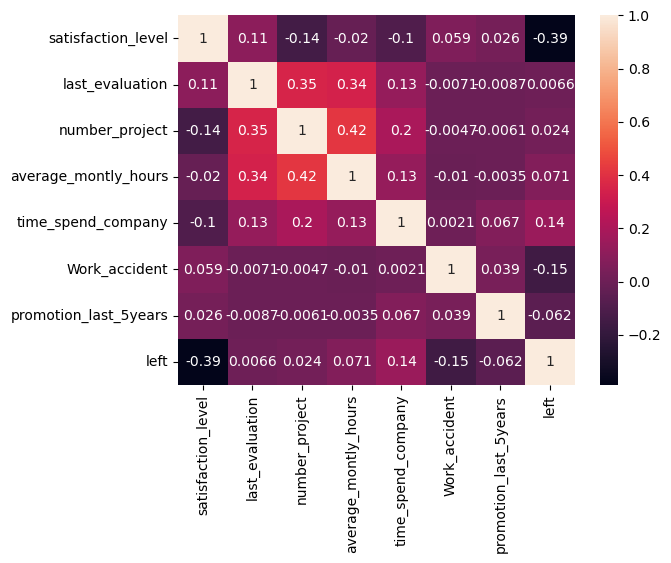

In [7]:
# To check the relation between dependent and independent variables:

sns.heatmap(data.corr(),annot= True)

# Observations
- Only one independent variable has significant relation with the target variable.
- All other relation is close to zero. Hence we can ignore those independent variables.
- Here we have to consider the categorical data sales and salary also.
- we can apply multiple Linear regression.

In [8]:
data = data[['satisfaction_level','sales','salary','left']]
data.head()

,satisfaction_level,sales,salary,left
0,0.38,sales,low,1
1,0.80,sales,medium,1
2,0.11,sales,medium,1
3,0.72,sales,low,1
4,0.37,sales,low,1


- satisfaction_level is in the range of feature scaling.

## Feature encoding

In [9]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
dic = {'low':0,'medium':1,'high':2}
data['salary'] = data['salary'].replace(dic)
data.head()

,satisfaction_level,sales,salary,left
0,0.38,sales,0,1
1,0.80,sales,1,1
2,0.11,sales,1,1
3,0.72,sales,0,1
4,0.37,sales,0,1


In [11]:
data_ohe = pd.get_dummies(data['sales'])
data_ohe

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [12]:
data = pd.concat([data,data_ohe],axis = 1)
data.head()

,satisfaction_level,sales,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,sales,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,sales,1,1,0,0,0,0,0,0,0,1,0,0
2,0.11,sales,1,1,0,0,0,0,0,0,0,1,0,0
3,0.72,sales,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,sales,0,1,0,0,0,0,0,0,0,1,0,0


In [13]:
data = data.drop('sales',axis=1)
data.head()

,satisfaction_level,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
0,0.38,0,1,0,0,0,0,0,0,0,0,0
1,0.80,1,1,0,0,0,0,0,0,0,0,0
2,0.11,1,1,0,0,0,0,0,0,0,0,0
3,0.72,0,1,0,0,0,0,0,0,0,0,0
4,0.37,0,1,0,0,0,0,0,0,0,0,0


In [14]:
data.columns

Index(['satisfaction_level', 'salary', 'left', 'IT', 'RandD', 'accounting',
       'hr', 'management', 'marketing', 'product_mng', 'support', 'technical'],
      dtype='object')

In [15]:
data = data[['satisfaction_level', 'salary', 'IT', 'RandD', 'accounting',
             'hr', 'management', 'marketing', 'product_mng', 'support', 'technical','left']]
data.head()

,satisfaction_level,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical,left
0,0.38,0,0,0,0,0,0,0,0,0,0,1
1,0.80,1,0,0,0,0,0,0,0,0,0,1
2,0.11,1,0,0,0,0,0,0,0,0,0,1
3,0.72,0,0,0,0,0,0,0,0,0,0,1
4,0.37,0,0,0,0,0,0,0,0,0,0,1


# step 4: separate x and y

In [16]:
x = data.drop('left',axis=1)
y = data['left']

# step 5: split the data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# step 6: Apply logistic  regression on the train  set

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

LogisticRegression()

# step 7: Perform predictions on test data

In [20]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [21]:
x_test.head()

,satisfaction_level,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical
1670,0.44,1,0,0,0,0,0,0,1,0,0
13378,0.55,1,0,0,0,0,0,0,1,0,0
10233,0.72,1,0,0,0,0,1,0,0,0,0
4719,0.96,0,1,0,0,0,0,0,0,0,0
7003,0.96,0,0,0,0,0,0,0,0,1,0


# step 8: Evaluation

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7831111111111111

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3245,  217],
       [ 759,  279]], dtype=int64)